In [1]:
!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#Part-1: EDA
data=pd.read_csv("news.csv")

In [22]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [23]:
# Checking the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (6335, 4)


In [24]:
# Checking for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


label
REAL    3171
FAKE    3164
Name: count, dtype: int64


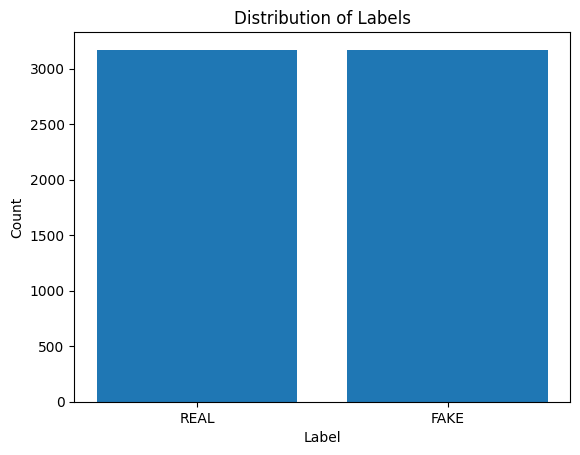

In [25]:
import matplotlib.pyplot as plt

# Distribution of Labels
label_counts = data['label'].value_counts()
print(label_counts)
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [26]:
# Explore the length distribution of titles and texts
data['title_length'] = data['title'].apply(lambda x: len(str(x)))
data['text_length'] = data['text'].apply(lambda x: len(str(x)))

print("Title length statistics:")
print(data['title_length'].describe())

print("\nText length statistics:")
print(data['text_length'].describe())

Title length statistics:
count    6335.000000
mean       65.277664
std        23.733657
min         1.000000
25%        49.000000
50%        64.000000
75%        78.000000
max       289.000000
Name: title_length, dtype: float64

Text length statistics:
count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: text_length, dtype: float64


In [27]:
# Looking for common keywords or phrases in titles and texts
from collections import Counter

# Tokenize titles and texts
titles_tokens = [word for sentence in data['title'].str.split() for word in sentence]
texts_tokens = [word for sentence in data['text'].str.split() for word in sentence]

# Count the frequency of words in titles and texts
title_word_freq = Counter(titles_tokens)
text_word_freq = Counter(texts_tokens)

# Print most common words in titles and texts
print("Most common words in titles:")
print(title_word_freq.most_common(20))

print("Most common words in texts:")
print(text_word_freq.most_common(20))

Most common words in titles:
[('to', 1283), ('the', 1167), ('The', 899), ('of', 864), ('in', 853), ('Trump', 780), ('for', 594), ('on', 589), ('and', 561), ('Clinton', 535), ('a', 493), ('Hillary', 472), ('is', 403), ('To', 402), ('In', 274), ('Is', 273), ('Donald', 264), ('Obama', 241), ('A', 231), ('GOP', 227)]
Most common words in texts:
[('the', 258287), ('to', 136726), ('of', 128321), ('and', 111419), ('a', 102501), ('in', 88519), ('that', 64272), ('is', 51951), ('for', 43472), ('on', 37624), ('with', 29296), ('as', 28971), ('The', 27197), ('was', 26567), ('are', 24582), ('be', 23801), ('have', 23759), ('by', 22722), ('he', 22613), ('has', 22042)]


In [28]:
#Part-2: Preprocessing

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kakar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kakar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Concatenate title and text data
data['combined_text'] = data['title'] + ' ' + data['text']
data['label'] = data['label'].map({'FAKE': 1, 'REAL': 0}).astype('int')


port_stem=PorterStemmer()

#Processing the data
def preprocess_data(content):
    con=re.sub('[^a-zA-Z]', ' ', content) # Removing special characters, punctuation, and numbers
    con=con.lower()
    word_tokens=word_tokenize(con) #Tokenization
    stemmed_tokens=[port_stem.stem(word) for word in word_tokens if not word in stopwords.words('english')] #Stemming and stop words removal
    stemmed_sentence=' '.join(stemmed_tokens)
    return stemmed_sentence


data['combined_text']= data['combined_text'].apply(preprocess_data)


# Vectorization: Using TF-IDF vectorization to convert the text data into numerical representations
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data. 
# We will have our preprocessed and vectorized data ready for classification
text_tfidf = tfidf_vectorizer.fit_transform(data['combined_text'])

In [30]:
data.head()

,Unnamed: 0,title,text,label,title_length,text_length,combined_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,28,7518,smell hillari fear daniel greenfield shillman ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,85,2646,watch exact moment paul ryan commit polit suic...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,43,2543,kerri go pari gestur sympathi u secretari stat...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,84,2660,berni support twitter erupt anger dnc tri warn...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,48,1840,battl new york primari matter primari day new ...


In [31]:
#Part-3: Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Splitting the Dataset
x = text_tfidf  # TF-IDF vectorized text data
y = data['label']
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.20)

In [33]:
#Model Training and Evaluation


#1. Logistic Regression

from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

LR = LogisticRegression(solver = "liblinear")
LR.fit(x_train, y_train)
y_pred_lr = LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_lr)

print("1. Logistic Regression")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
conf_matrix_lr = confusion_matrix(y_test,y_pred_lr)
print(conf_matrix_lr)
# Precision = True Positives / (True Positives + False Positives)
# Recall = True Positives / (True Positives + False Negatives)

1. Logistic Regression
Accuracy: 0.914759273875296
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       666
           1       0.89      0.94      0.91       601

    accuracy                           0.91      1267
   macro avg       0.91      0.92      0.91      1267
weighted avg       0.92      0.91      0.91      1267

Confusion Matrix:
[[594  72]
 [ 36 565]]


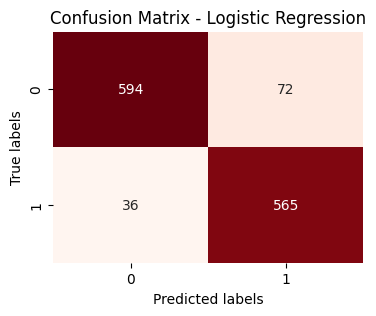

In [34]:
# Plotting confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [35]:
#2.Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dec_tree_model=DecisionTreeClassifier(criterion = "gini", )
dec_tree_model.fit(x_train, y_train)
y_pred_dt=dec_tree_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt)

print("\n 2. Decision Tree Classifier")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_test,y_pred_dt)
print(conf_matrix_dt)
# Precision = True Positives / (True Positives + False Positives)
# Recall = True Positives / (True Positives + False Negatives)


 2. Decision Tree Classifier
Accuracy: 0.8287292817679558
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       666
           1       0.82      0.83      0.82       601

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

Confusion Matrix:
[[554 112]
 [105 496]]


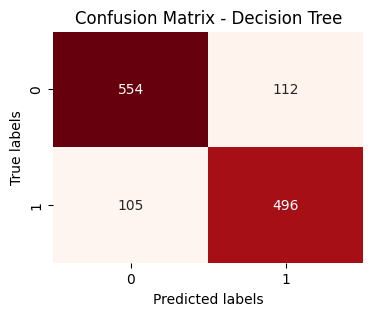

In [36]:
# Plotting confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [37]:
#3. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = "gini", n_estimators = 150)
rfc.fit(x_train, y_train)
y_pred_rf = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf)

print("\n 3. Random Forest Classifier")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test,y_pred_rf)
print(conf_matrix_rf)
# Precision = True Positives / (True Positives + False Positives)
# Recall = True Positives / (True Positives + False Negatives)


 3. Random Forest Classifier
Accuracy: 0.8950276243093923
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       666
           1       0.89      0.89      0.89       601

    accuracy                           0.90      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.90      0.90      0.90      1267

Confusion Matrix:
[[598  68]
 [ 65 536]]


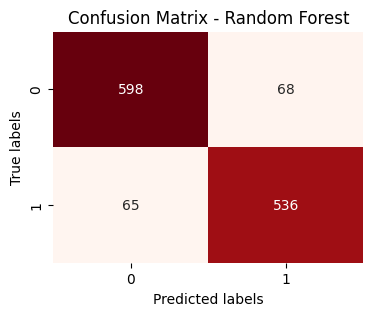

In [38]:
# Plotting confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [39]:
#Part-4: Model Deployment: UI and Prediction

import pickle
pickle.dump(tfidf_vectorizer, open('vector.pkl', 'wb'))
pickle.dump(LR, open('model.pkl', 'wb'))
